In [2]:
import pandas as pd
from pandas import DataFrame
import os
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import seaborn as sns


pd.set_option("display.max_rows", 6)

images='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/Supplemental_images/'
if os.path.isdir(images):
    print(images, "already exists.")
else:
    os.mkdir(images)
    print(images, "is created.")
    
os.chdir('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/Supplemental_images')    

matplotlib.__version__

/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/Supplemental_images/ already exists.


'3.1.0'

rerun on 2021-12-07 after correcting for salinity of media samples

In [3]:
SAGs=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/All_GoM_SAGs_1cell_20kb_decon_531normalized_predresp_rate_GTDBclass.csv',
                index_col=0)

gates=['Respiring cells (RSG-positive)', 'All prokaryotes (SYTO-9-positive)']

SAGs=SAGs[SAGs['gate'].isin(gates)]

SAGs=SAGs[SAGs['FACS_date']==SAGs['Sample_collection_Date']]
SAGs=SAGs[SAGs['checkM_estimated_completeness']>=0]
SAGs=SAGs[['gate', 'checkM_estimated_completeness']].copy()
SAGs


,gate,checkM_estimated_completeness
0,Respiring cells (RSG-positive),22.64
1,Respiring cells (RSG-positive),86.23
2,Respiring cells (RSG-positive),74.13
...,...,...
5847,All prokaryotes (SYTO-9-positive),80.98
5848,All prokaryotes (SYTO-9-positive),20.13
5849,All prokaryotes (SYTO-9-positive),36.21


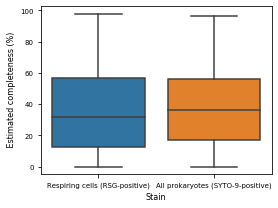

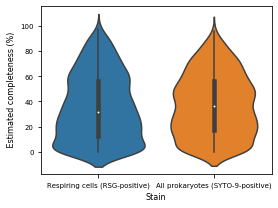

In [4]:
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
fig, ax = plt.subplots(figsize=(4,3))
box=sns.boxplot(data=SAGs, x='gate', y='checkM_estimated_completeness')
plt.xlabel('Stain', fontsize=8)

plt.ylabel(' Estimated completeness (%)')
plt.tight_layout()
plt.savefig(images+"Fresh_RSG_Syto9_completeness.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(4,3))
violin=sns.violinplot(data=SAGs, x='gate', y='checkM_estimated_completeness')
plt.xlabel('Stain')
plt.ylabel(' Estimated completeness (%)')
plt.tight_layout()
plt.savefig(images+"Fresh_RSG_Syto9_violin_completeness.pdf")
plt.show()

In [5]:
from datetime import datetime

chlfile='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/chl_analysis/2017_2019_chla_measurements.tsv'

chl_df=pd.read_csv(chlfile, sep='\t')
chl_df=chl_df[chl_df['SampleLocale']=='bbh']
chl_df['date']=chl_df['date'].astype(str)
chl_df['year']=chl_df['date'].str[0:4]
chl_df['month']=chl_df['date'].str[4:6]
chl_df['day']=chl_df['date'].str[6:8]
chl_df[['year', 'month', 'day']]=chl_df[['year', 'month', 'day']].apply(pd.to_numeric)
chl_df['date']=pd.to_datetime(chl_df['date'])
# chl_df['date2'] = datetime.strptime(chl_df['date'], '%Y%m%d').strftime('%m/%d/%Y')

chl_df
# date = datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]))


,date,SAG_per_ml,perc_SAGs_bacteroidia,mg_per_ml,perc_mg_bacteroidia,ChlWW,SampleLocale,year,month,day
0,2017-01-10,NaN,NaN,NaN,NaN,1.14,bbh,2017,1,10
1,2017-01-17,NaN,NaN,NaN,NaN,0.85,bbh,2017,1,17
2,2017-01-26,NaN,NaN,NaN,NaN,0.71,bbh,2017,1,26
...,...,...,...,...,...,...,...,...,...,...
71,2019-11-13,NaN,NaN,NaN,NaN,4.01,bbh,2019,11,13
72,2019-11-25,NaN,NaN,NaN,NaN,1.43,bbh,2019,11,25
73,2019-12-12,NaN,NaN,NaN,NaN,0.60,bbh,2019,12,12


/mnt/scgc_nfs/opt/common/anaconda3a/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


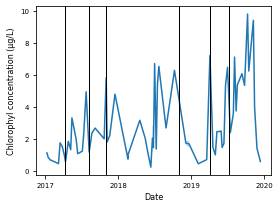

In [6]:
import matplotlib.dates as md
from matplotlib.dates import DateFormatter
import datetime as dt

plt.rcParams['axes.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7

fig, ax = plt.subplots(figsize=(4,3))
chl_plt=sns.lineplot(data=chl_df, x='date', y='ChlWW')

date_form = DateFormatter("%Y")
locator = md.YearLocator()

ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(locator)

plt.axvline(dt.datetime(2017,4,12), color='k', linewidth=1)
plt.axvline(dt.datetime(2017,8,8), color='k', linewidth=1)
plt.axvline(dt.datetime(2017,11,2), color='k', linewidth=1)
plt.axvline(dt.datetime(2018,10,30), color='k', linewidth=1)
plt.axvline(dt.datetime(2019,4,2), color='k', linewidth=1)
plt.axvline(dt.datetime(2019,7,9), color='k', linewidth=1)

plt.ylabel('Chlorophyl concentration (µg/L)')
plt.xlabel('Date')
plt.tight_layout()

plt.savefig(os.path.join(images,'Fig_S3D_Chl_concentration.pdf'))

In [26]:
#Now figure 3F

RSG_data='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/csv_files_for_figures/RSG_optimization_data.csv'
RSG_df=pd.read_csv(RSG_data)
RSG_df


,minutes,Cell counts,Fluorescence,Replicate
0,9,1.462,59.7,One
1,19,1.582,62.8,One
2,29,1.627,63.3,One
...,...,...,...,...
5,24,1.567,63.7,Two
6,34,1.627,63.8,Two
7,74,1.677,62.3,Two


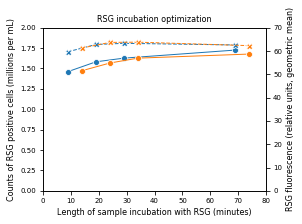

In [55]:
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7

fig, ax = plt.subplots(figsize=(4,3))

ax = sns.lineplot(data=RSG_df, x="minutes", y="Cell counts", legend=False, hue='Replicate', linestyle='solid', 
                  linewidth=1, marker='o')
ax2 = ax.twinx()
ax.set_ylim(0,2)
ax.set_xlim(0,80)
sns.lineplot(data=RSG_df, x="minutes", y="Fluorescence", ax=ax2, legend=False, hue="Replicate", linestyle='dashed', 
             linewidth=1, marker='X')
ax2.set_ylim(0,70)
ax2.lines[1].set_linestyle("--")
ax2.lines[0].set_linestyle("--")

ax.set_ylabel('Counts of RSG positive cells (millions per mL)')

ax2.set_ylabel('RSG fluorescence (relative units, geometric mean)')
ax.set_xlabel('Length of sample incubation with RSG (minutes)')
# plt.title('RSG incubation optimization', fontsize=8)

plt.savefig(os.path.join(images,'Fig_S3F_RSG_optimization.pdf'))
plt.show()

# I believe that everything below can be deleted

In [5]:
cols=['sample_collection_date', 'gate', 'GTDB_classification']
newSAGs=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/202108_GoM_resp_decon_1cell_SAGs_master_predresp_rate.csv',
                   index_col=0, usecols=cols)
print(newSAGs.columns)
newSAGs['count']=1

newSAGs=newSAGs.groupby(by=['GTDB_classification', 'gate','sample_collection_date']).count()

newSAGs=newSAGs.reset_index()

newSAGs=newSAGs.rename(columns={'gate':'stain', 'sample_collection_date':'date', 'count':'num_of_cells'})
newSAGs['stain']=newSAGs['stain'].map({'Respiring cells (RSG-positive)':'RSG',
                                   'All prokaryotes (SYTO-9-positive)':'Syto9'})

newSAGs=newSAGs[['GTDB_classification', 'date', 'num_of_cells', 'stain']]
newSAGs=newSAGs[newSAGs['num_of_cells']>=3]
newSAGs['date']=newSAGs['date'].astype(str)

newSAGs


Index(['gate', 'sample_collection_date'], dtype='object')


,GTDB_classification,date,num_of_cells,stain
0,AAA536-G10,210824,4,RSG
1,AAA536-G10,210825,4,RSG
3,Actinomarina,210824,3,Syto9
4,Actinomarina,210825,4,Syto9
11,Amylibacter,210825,14,Syto9
...,...,...,...,...
222,UBA8337,210825,10,RSG
231,Unclassified,210824,16,Syto9
232,Unclassified,210825,10,Syto9
233,Unclassified,210824,27,RSG


In [6]:
cols=['170412', '170818', '171102', '181030', '190402', '190709', 'GTDB_classification']

RSG=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/RSG_SAG_abundances.csv',
               usecols=cols)
RSG=RSG.melt(id_vars='GTDB_classification', var_name='date', value_name='num_of_cells')
RSG=RSG.dropna()
RSG['stain']='RSG'
#RSG=RSG[RSG['num_of_cells']>=3]

Syto=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/Syto9_SAG_abundances.csv',
                usecols=cols)
Syto=Syto.melt(id_vars='GTDB_classification', var_name='date', value_name='num_of_cells')
Syto=Syto.dropna()
Syto['stain']='Syto9'
#Syto=Syto[Syto['num_of_cells']>=3]

cells=pd.concat([RSG, Syto, newSAGs], ignore_index=True)
# I need to add a percent calculation here
cells=cells.reset_index()

total=cells.groupby(['date', 'stain']).agg({'num_of_cells': "sum"})
total=total.rename(columns={'num_of_cells':'total_cells'})
cells=cells.merge(total, on=['date', 'stain'])
cells['perc_of_cells']=cells['num_of_cells']/cells['total_cells']*100

cells=cells[cells['num_of_cells']>=3]
cells.to_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/Genus_abundances.csv')

cells=cells.sort_values(by=['stain', 'date', 'num_of_cells'], ascending=[False, True, False])

cells

plt_order=cells['GTDB_classification'].to_list()
print(len(plt_order))
plt_order=list(dict.fromkeys(plt_order))
print(len(plt_order))
cells

Apr17=cells[cells['date']=='170412']
Aug17=cells[cells['date']=='170818']
Nov17=cells[cells['date']=='171102']
Oct18=cells[cells['date']=='181030']
Apr19=cells[cells['date']=='190402']
Jul19=cells[cells['date']=='190709']
Aug24=cells[cells['date']=='210824']
Aug25=cells[cells['date']=='210825']
Oct18

Oct18

331
74


,index,GTDB_classification,date,num_of_cells,stain,total_cells,perc_of_cells
643,643,Pelagibacter,181030,100.0,Syto9,284.0,35.211268
675,675,Unclassified,181030,27.0,Syto9,284.0,9.507042
624,624,D2472,181030,16.0,Syto9,284.0,5.633803
644,644,Pelagibacter_A,181030,15.0,Syto9,284.0,5.281690
651,651,SCGC-AAA076-P13,181030,13.0,Syto9,284.0,4.577465
659,659,Thioglobus_A,181030,8.0,Syto9,284.0,2.816901
620,620,BACL14,181030,7.0,Syto9,284.0,2.464789
640,640,Nitrosopumilus,181030,7.0,Syto9,284.0,2.464789
650,650,Puniceispirillum,181030,7.0,Syto9,284.0,2.464789
615,615,AAA536-G10,181030,6.0,Syto9,284.0,2.112676


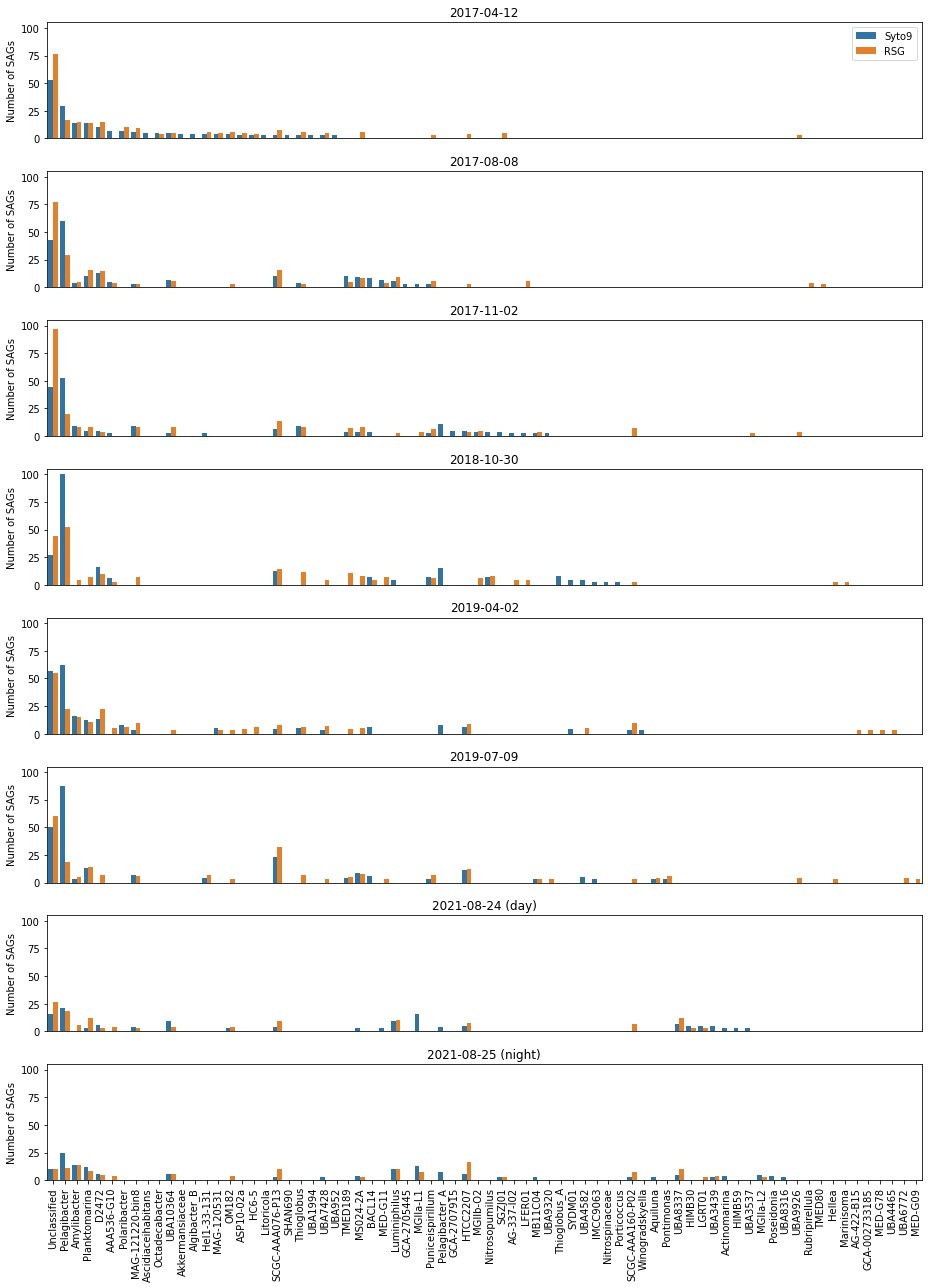

In [7]:
fig = plt.figure(figsize =(13, 18))

plt.subplot(8, 1, 1)
ax1=sns.barplot(data=Apr17, x='GTDB_classification', y='num_of_cells', order=plt_order, hue='stain')
plt.xticks(ticks=[])
plt.legend(loc='upper right')
ax1.set_ylim([0, 105])

plt.subplot(8, 1, 2)
ax2=sns.barplot(data=Aug17, x='GTDB_classification', y='num_of_cells', order=plt_order, hue='stain')
plt.xticks(ticks=[])
ax2.set_ylim([0, 105])

plt.subplot(8, 1, 3)
ax3=sns.barplot(data=Nov17, x='GTDB_classification', y='num_of_cells', order=plt_order, hue='stain')
plt.xticks(ticks=[])
ax3.set_ylim([0, 105])

plt.subplot(8, 1, 4)
ax4=sns.barplot(data=Oct18, x='GTDB_classification', y='num_of_cells', order=plt_order, hue='stain')
plt.xticks(ticks=[])
ax4.set_ylim([0, 105])

plt.subplot(8, 1, 5)
ax5=sns.barplot(data=Apr19, x='GTDB_classification', y='num_of_cells', order=plt_order, hue='stain')
plt.xticks(ticks=[])
ax5.set_ylim([0, 105])

plt.subplot(8, 1, 6)
ax6=sns.barplot(data=Jul19, x='GTDB_classification', y='num_of_cells', order=plt_order, hue='stain')
plt.xticks(ticks=[])
ax6.set_ylim([0, 105])

plt.subplot(8, 1, 7)
ax7=sns.barplot(data=Aug24, x='GTDB_classification', y='num_of_cells', order=plt_order, hue='stain')
plt.xticks(ticks=[])
ax7.set_ylim([0, 105])

plt.subplot(8, 1, 8)
ax8=sns.barplot(data=Aug25, x='GTDB_classification', y='num_of_cells', order=plt_order, hue='stain')
plt.xticks(rotation=90)
ax8.set_ylim([0, 105])


#remove legend from all but the first
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()
ax5.get_legend().remove()
ax6.get_legend().remove()
ax7.get_legend().remove()
ax8.get_legend().remove()

#Add the date as the title
ax1.title.set_text('2017-04-12')
ax2.title.set_text('2017-08-08')
ax3.title.set_text('2017-11-02')
ax4.title.set_text('2018-10-30')
ax5.title.set_text('2019-04-02')
ax6.title.set_text('2019-07-09')
ax7.title.set_text('2021-08-24 (day)')
ax8.title.set_text('2021-08-25 (night)')

#remove the x axis label
ax1.set(xlabel=None, ylabel='Number of SAGs')
ax2.set(xlabel=None, ylabel='Number of SAGs')
ax3.set(xlabel=None, ylabel='Number of SAGs')
ax4.set(xlabel=None, ylabel='Number of SAGs')
ax5.set(xlabel=None, ylabel='Number of SAGs')
ax6.set(xlabel=None, ylabel='Number of SAGs')
ax7.set(xlabel=None, ylabel='Number of SAGs')
ax8.set(xlabel=None, ylabel='Number of SAGs')

#remove the x axis tick marks
ax1.tick_params(bottom=False)
ax2.tick_params(bottom=False)
ax3.tick_params(bottom=False)
ax4.tick_params(bottom=False)
ax5.tick_params(bottom=False)
ax6.tick_params(bottom=False)
ax7.tick_params(bottom=False)

fig.tight_layout()

plt.savefig(images+'RSG_Syto9_abundance.pdf')

plt.show()

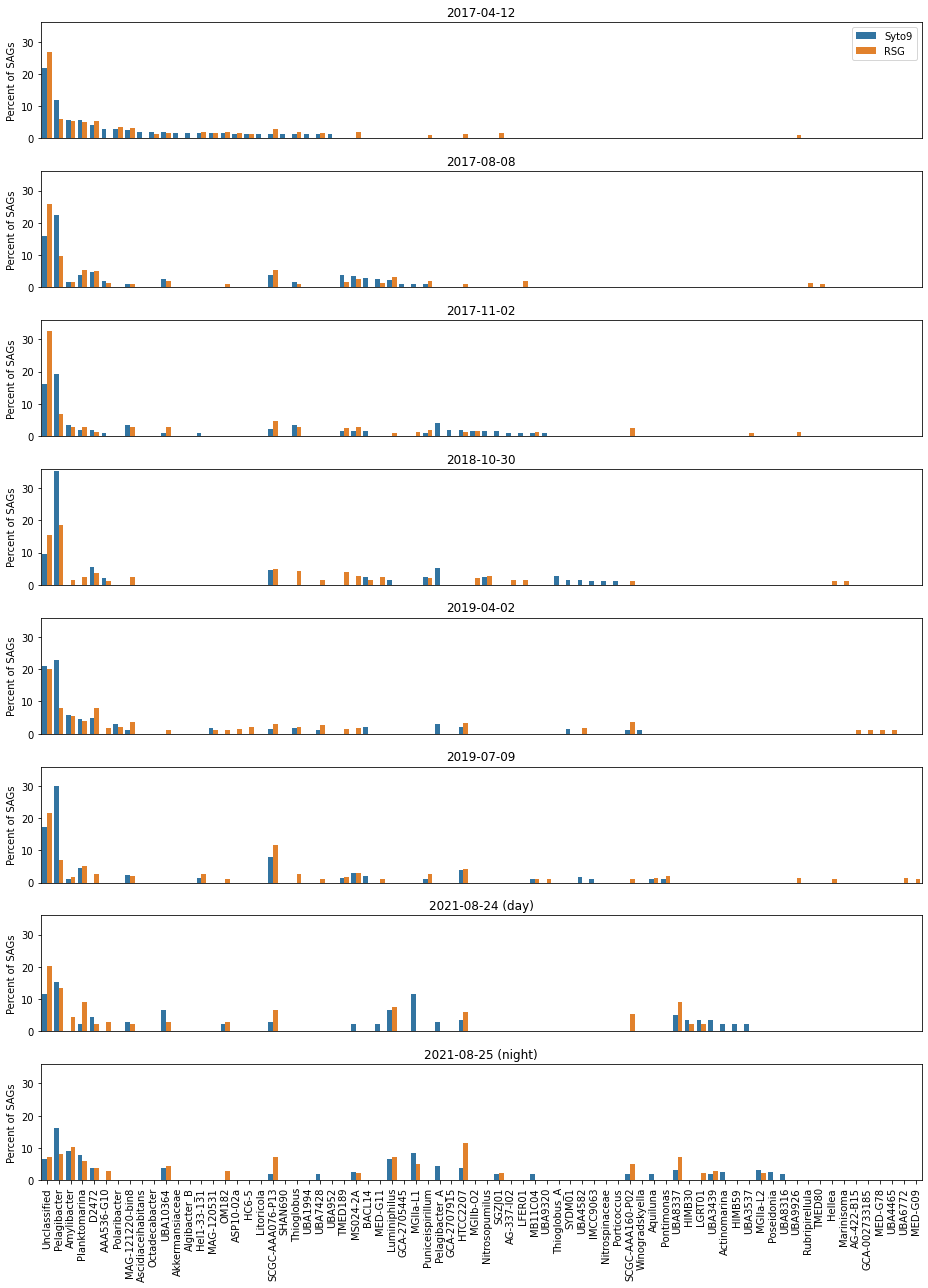

In [8]:
fig = plt.figure(figsize =(13, 18))

plt.subplot(8, 1, 1)
ax1=sns.barplot(data=Apr17, x='GTDB_classification', y='perc_of_cells', order=plt_order, hue='stain')
plt.xticks(ticks=[])
plt.legend(loc='upper right')
ax1.set_ylim([0, 36])

plt.subplot(8, 1, 2)
ax2=sns.barplot(data=Aug17, x='GTDB_classification', y='perc_of_cells', order=plt_order, hue='stain')
plt.xticks(ticks=[])
ax2.set_ylim([0, 36])

plt.subplot(8, 1, 3)
ax3=sns.barplot(data=Nov17, x='GTDB_classification', y='perc_of_cells', order=plt_order, hue='stain')
plt.xticks(ticks=[])
ax3.set_ylim([0, 36])

plt.subplot(8, 1, 4)
ax4=sns.barplot(data=Oct18, x='GTDB_classification', y='perc_of_cells', order=plt_order, hue='stain')
plt.xticks(ticks=[])
ax4.set_ylim([0, 36])

plt.subplot(8, 1, 5)
ax5=sns.barplot(data=Apr19, x='GTDB_classification', y='perc_of_cells', order=plt_order, hue='stain')
plt.xticks(ticks=[])
ax5.set_ylim([0, 36])

plt.subplot(8, 1, 6)
ax6=sns.barplot(data=Jul19, x='GTDB_classification', y='perc_of_cells', order=plt_order, hue='stain')
plt.xticks(ticks=[])
ax6.set_ylim([0, 36])

plt.subplot(8, 1, 7)
ax7=sns.barplot(data=Aug24, x='GTDB_classification', y='perc_of_cells', order=plt_order, hue='stain')
plt.xticks(ticks=[])
ax7.set_ylim([0, 36])

plt.subplot(8, 1, 8)
ax8=sns.barplot(data=Aug25, x='GTDB_classification', y='perc_of_cells', order=plt_order, hue='stain')
plt.xticks(rotation=90)
ax8.set_ylim([0, 36])


#remove legend from all but the first
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()
ax5.get_legend().remove()
ax6.get_legend().remove()
ax7.get_legend().remove()
ax8.get_legend().remove()

#Add the date as the title
ax1.title.set_text('2017-04-12')
ax2.title.set_text('2017-08-08')
ax3.title.set_text('2017-11-02')
ax4.title.set_text('2018-10-30')
ax5.title.set_text('2019-04-02')
ax6.title.set_text('2019-07-09')
ax7.title.set_text('2021-08-24 (day)')
ax8.title.set_text('2021-08-25 (night)')

#remove the x axis label
ax1.set(xlabel=None, ylabel='Percent of SAGs')
ax2.set(xlabel=None, ylabel='Percent of SAGs')
ax3.set(xlabel=None, ylabel='Percent of SAGs')
ax4.set(xlabel=None, ylabel='Percent of SAGs')
ax5.set(xlabel=None, ylabel='Percent of SAGs')
ax6.set(xlabel=None, ylabel='Percent of SAGs')
ax7.set(xlabel=None, ylabel='Percent of SAGs')
ax8.set(xlabel=None, ylabel='Percent of SAGs')

#remove the x axis tick marks
ax1.tick_params(bottom=False)
ax2.tick_params(bottom=False)
ax3.tick_params(bottom=False)
ax4.tick_params(bottom=False)
ax5.tick_params(bottom=False)
ax6.tick_params(bottom=False)
ax7.tick_params(bottom=False)

fig.tight_layout()

plt.savefig(images+'RSG_Syto9_relative_abundance.pdf')

plt.show()